# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import array
from sklearn.decomposition import PCA
import seaborn as sns

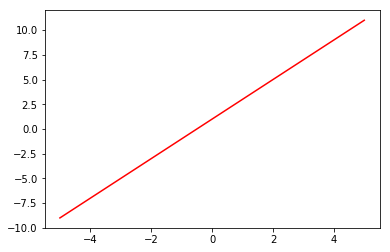

In [5]:
x = np.linspace(-5,5,100)
y = 2*x+1
plt.plot(x,y,'-r')

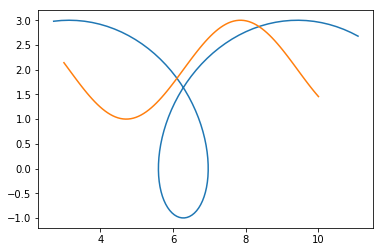

In [13]:
a, b = 1, 2
phi = np.linspace(3, 10, 100)
x1 = a*phi - b*np.sin(phi)
y1 = a - b*np.cos(phi)
x2 = phi
y2 = np.sin(phi)+2

plt.plot(x1,y1)
plt.plot(x2,y2)

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

It is because they are inconsistent in their relationships between variables. Their input is not mappped to one output.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

R5

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

3D input 2D output

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

pd.get_dummies()

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [30]:
p = np.array([[1, 3],[-1, 2]])

p

array([[ 1,  3],
       [-1,  2]])

In [41]:
q = np.array([[4, -1, 5], [1, 2, 1], [2, 3, -2]])

q_T = q.T

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [43]:
test = np.array([1,2])

test2 = np.array([1,2,3])

In [44]:
np.dot(p, test)

array([7, 3])

In [45]:
np.dot(q_T, test2)

array([12, 12,  1])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

```
The intuition behind eigenvalues and eigenvectors is that they represent the basis for transforming a space. The e-vectors stay pointed in the same direction regardless of the transformation taking place. The e-value is a scalar that substantiates the change that occured to the e-vector during tranformation.
```

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

```
The crux of the issue lies with the high risk of overfitting given a great number of dimensions paired with insufficient observations. Other issues include increased processing power necessary to perform computations, euclidean distance losing meaning, and redundancy.
```

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

``` N >= 5 * parameters```

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [66]:
import pandas as pd

df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')

In [67]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [68]:
x = df['species']
Y = df.drop('species', axis=1)

In [69]:
Y.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [70]:
Y.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [74]:
Y = Y.sub(Y.mean())

In [79]:
Y.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667


In [78]:
Y.std()

sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64

In [80]:
Y = Y.divide(Y.std())

In [83]:
Y.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [107]:
np.corrcoef(Y.T)

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [117]:
covariance_matrix = np.cov(Y.T)

covariance_matrix

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [118]:
values, vectors = np.linalg.eig(covariance_matrix)

print("\n Eigenvectors: \n", vectors)
print("\n Eigenvalues: \n", values)


 Eigenvectors: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

 Eigenvalues: 
 [2.91081808 0.92122093 0.14735328 0.02060771]


In [125]:
vectors.T.dot(Y.T)

array([[-2.25698063e+00, -2.07945912e+00, -2.36004408e+00,
        -2.29650366e+00, -2.38080159e+00, -2.06362348e+00,
        -2.43754534e+00, -2.22638327e+00, -2.33413810e+00,
        -2.18136797e+00, -2.15626287e+00, -2.31960686e+00,
        -2.21665672e+00, -2.63090249e+00, -2.18497165e+00,
        -2.24394778e+00, -2.19539570e+00, -2.18286636e+00,
        -1.88775015e+00, -2.33213620e+00, -1.90816387e+00,
        -2.19728429e+00, -2.76490710e+00, -1.81433338e+00,
        -2.22077769e+00, -1.95048969e+00, -2.04521166e+00,
        -2.16095426e+00, -2.13315968e+00, -2.26121491e+00,
        -2.13739396e+00, -1.82582143e+00, -2.59949432e+00,
        -2.42981077e+00, -2.18136797e+00, -2.20373717e+00,
        -2.03759040e+00, -2.18136797e+00, -2.42781878e+00,
        -2.16329995e+00, -2.27889274e+00, -1.86545777e+00,
        -2.54929405e+00, -1.95772074e+00, -2.12624970e+00,
        -2.06842817e+00, -2.37330742e+00, -2.39018435e+00,
        -2.21934620e+00, -2.19858869e+00,  1.10030752e+0

In [128]:
Y.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593


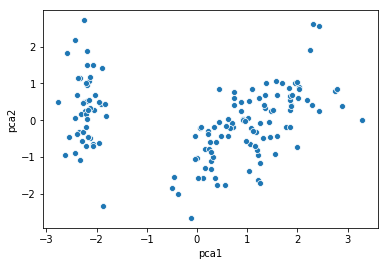

In [130]:
pca = PCA(n_components=2).fit_transform(Y)
results = pd.DataFrame(pca, columns=['pca1','pca2'])

sns.scatterplot(x='pca1',y='pca2',data=results)
plt.show()


# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)